In [33]:
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
data=pd.read_csv("Mall_Customers.csv")

In [35]:
data.sample(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
169,170,Male,32,87,63
55,56,Male,47,43,41
146,147,Male,48,77,36
153,154,Female,38,78,76


In [36]:
data=data[["Annual Income (k$)","Spending Score (1-100)"]]

In [37]:
data.sample(5)

,Annual Income (k$),Spending Score (1-100)
12,20,15
40,38,35
50,42,52
35,33,81
80,54,51


In [38]:
data=data.rename(columns={"Annual Income (k$)":"Income"})

In [39]:
data.sample(5)

,Income,Spending Score (1-100)
71,49,42
189,103,85
29,29,87
191,103,69
184,99,39


In [40]:
data.head(5)

,Income,Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [43]:
data.head(5)

,Income,Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [45]:
data=data.rename(columns={"Spending Score (1-100)":"Score"})

In [46]:
data.head(5)

,Income,Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Text(0, 0.5, 'Score')

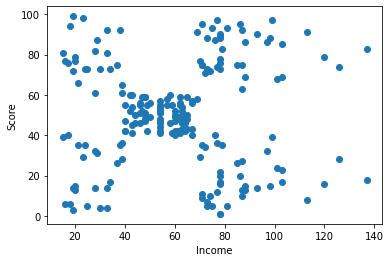

In [48]:
plt.scatter(data.Income,data.Score)
plt.xlabel("Income")
plt.ylabel("Score")

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Income  200 non-null    int64
 1   Score   200 non-null    int64
dtypes: int64(2)
memory usage: 3.2 KB


In [52]:
from sklearn.cluster import KMeans

In [56]:
k=[1,2,3,4,5,6,7,8,9,10]
wss=[]
for i in k:
    model=KMeans(n_clusters=i)
    model.fit(data[["Income","Score"]])
    wss.append(model.inertia_)
    

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [57]:
wss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37233.81451071002,
 30241.34361793659,
 25028.020475269397,
 21818.11458845217,
 19787.67055496685]

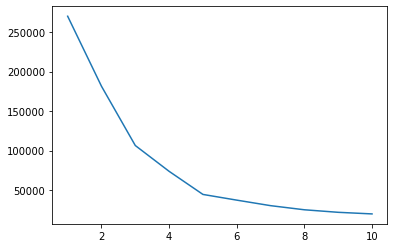

In [60]:
plt.plot(k,wss)

In [61]:
model=KMeans(n_clusters=5)
pred=model.fit_predict(data)


In [63]:
pred

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 3,
       4, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 2, 3, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [64]:
data["Cluster"]=pred

In [65]:
data.head(5)

,Income,Score,Cluster
0,15,39,4
1,15,81,0
2,16,6,4
3,16,77,0
4,17,40,4


In [67]:
c1=data[data['Cluster']==0]
c2=data[data['Cluster']==1]
c3=data[data['Cluster']==2]
c4=data[data['Cluster']==3]
c5=data[data['Cluster']==4]

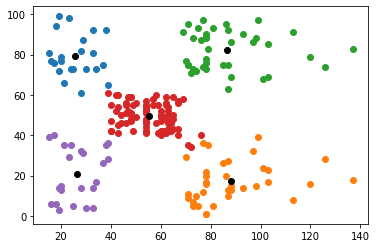

In [73]:
plt.scatter(c1["Income"],c1["Score"])
plt.scatter(c2["Income"],c2["Score"])
plt.scatter(c3["Income"],c3["Score"])
plt.scatter(c4["Income"],c4["Score"])
plt.scatter(c5["Income"],c5["Score"])
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='black')


In [69]:
model.cluster_centers_

array([[25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [26.30434783, 20.91304348]])